**Businesses by Neighborhood "ZipCodes"**

**By Mubashir Mia**

Group 12 - Canvas


In [1]:
import geopandas as gpd
import pandas as pd
import csv


# Load in the neighborhoods businesses

neighborhood_data = gpd.read_file('data/Pittsburghneighborhoodbusinesses.csv')

neighborhood_data.head(10)

,certification_type,firm_name,owners,work_description,naics_codes,physical_address,mailing_address,phone_number,fax_number,email_address,website,geometry
0,DBE,3 Rivers Pipe Profiling,Victoria Hunter,3 Rivers Pipe Profiling offers remote CCTV and...,541990,"8 Taper Dr.\nPittsburgh, PA 15241","8 Taper Dr.\nPittsburgh, PA 15241",412-841-4876,412-308-6767,victoria@3riverspipe.com,http://www.3riverspipe.com,None
1,DBE,3D Plastering and Texturing Limited Liability ...,Andrew Luster,Provides plastering textring drywall finishing...,238130 238140 238170 238310 238320 238330 2383...,"743 Vassar Street\nPittsburgh, PA 15206","743 Vassar Street\nPittsburgh, PA 15206",412-287-0449,,aluster101@gmail.com,,None
2,DBE,6 Degrees Consulting Inc.,Mr Robert Lawson,Sales/marketing/bsiness development/onstrtion ...,236220 238130 238150 238160 238170 238190 2382...,"353 Heberton Street\nPittsburgh, PA 15206","353 Heberton Street\nPittsburgh, PA 15206",412-361-0157,412-361-0131,blawson@6degreesconsulting.net,http://www.6degreesconsulting.net,None
3,DBE,925 Demolition LLC,Jody Little,Interior and exterior demolition debris lean p...,238910,"47 Basman Street\nPittsburgh, PA 15210","47 Basman Street\nPittsburgh, PA 15210",412-537-8241,,JL925demolition@icloud.com,,None
4,DBE,A For the People Insurance Agency Inc.,William Hawthorne,Insrane ageny - bsiness home ato life and health.,524210,"54 Wylie Avene\nPittsburgh, PA 15219","54 Wylie Avene\nPittsburgh, PA 15219",412-621-5581,412-681-5506,bill@aforthepeople.com,http://www.aforthepeople.com,None
5,DBE,A Touch Above the Rest Commercial Cleaning,Gerri Germany,Commerial and residential leaing servies along...,238990 561720 561790,"5 Norma Hill Drive\nPittsburgh, PA 15201","5 Norma Hill Drive\nPittsburgh, PA 15201",412-482-8911,412-781-6905,gerrig1226@aol.com,,None
6,DBE,A&A Consultants Inc.,Mr. Elfaith Ahmed,Conslting engineering-geotehnial strtral envir...,236210 236220 237110 237990 238910 541330 541380,"8 Pine Hollow Road\nSite 4A\nMcKees Rocks, PA ...","8 Pine Hollow Road\nSite 4A\nMcKees Rocks, PA ...",412-323-2200,412-323-2202,petroff@aaconsultinc.com,http://www.aaconsultinc.com,None
7,DBE,A&F ENGINEERING LLC,Kelly Magill,Eletrial mehanial and plmbing engineering.,541330,"4 Atlanti Avene\nElizabeth, PA 15037","4 Atlanti Avene\nElizabeth, PA 15037",412-405-9343,412-405-8446,kmagill@af-engineering.net,,None
8,DBE,A. P. Enterprise LLC,Harrison Purdy,Offie spplies offie eqipment and faility maint...,425120 541611,"James Henry Jr Pl\nPittsburgh, PA 15213","James Henry Jr Pl\nPittsburgh, PA 15213",717-681-5199,,HarrisonPurdy@apEnterprisellc.org,http://www.apenterprisellc.com,None
9,DBE,ABKaelin LLC,Ms. Alison Kaelin,Qality assrane aditing oatings onslting to tra...,541330 541620 541690 541990,"5 Marshall Road\nPittsburgh, PA 15214","5 Marshall Road\nPittsburgh, PA 15214",412-841-7260,,abkaelin@comcast.net,http://www.abkaelin.com,None


In [2]:



# Using functions we can extract the zipcode from the address in the dataset

def extractZipCode(address):

# Using conditions we are simply trying to read the zipcode after "PA"

    if "PA" in address:
        index = address.index("PA")
        zipCode = address[(index+2):len(address)].strip()
    else:
        zipCode = "NOT IN PA"


    if len(zipCode) > 5:
        secondOccIndex = zipCode.index("PA")
        zipCode = zipCode[secondOccIndex+2:len(zipCode)].strip()
        return zipCode
    else:
        return zipCode
    
# Using another functions we are ectracting the city "Neighborhood" associated with the zipcode
# Using conditions we are simply finding the city after each new line

def extractCity(address):
    if check(address):
        index = address.index(",")
        spaceIndex = address.rfind("\n",0, index)
        city =  address[spaceIndex:index].strip()
    else:
        city = "Comma Not Detected!"
    return city

# Using this function we are checking our data if it has the specific 'attributes'  

def check(address):
    isOkay = True
    if "," in address:
        isOkay = False
    if "PA" in address:
        isOkay = True
    return isOkay
        
        
# Creating 2 new lists and putting the zipcode and the city after extracting it from the dataset
# Both together combined on a new 'myCompleteList'

newList = neighborhood_data["physical_address"].tolist()
cityList = neighborhood_data["physical_address"].tolist()

myCompleteList = []

for i in range(0, len(newList)):
    tempAdd = newList[i]
    newList[i] = extractZipCode(tempAdd)
    cityList[i] = extractCity(tempAdd)



# Here we are creating a dtaframe of columns "City and ZipCode"

neighborhoods = pd.DataFrame(columns = ["City", "Zip Code"])

neighborhoods["City"] =  pd.Series(cityList)
neighborhoods["Zip Code"] = pd.Series(newList) 


# Here we are counting how many times a zipcode has been repeated and 
# then assigning it to number of businesses column

neighborhoods_sorted = neighborhoods[['City','Zip Code']].groupby(['Zip Code', "City" ])['City'] \
                             .count() \
                             .reset_index(name='# Bussiness') \
                             .sort_values(['# Bussiness'], ascending=False) \
                             .head(40)



neighborhoods_sorted.head(40)





,Zip Code,City,# Bussiness
66,15212,Pittsburgh,32
76,15219,Pittsburgh,22
98,15235,Pittsburgh,19
58,15206,Pittsburgh,17
80,15221,Pittsburgh,13
102,15237,Pittsburgh,12
83,15222,Pittsburgh,11
24,15106,Carnegie,11
57,15205,Pittsburgh,11
21,15102,Bethel Park,10


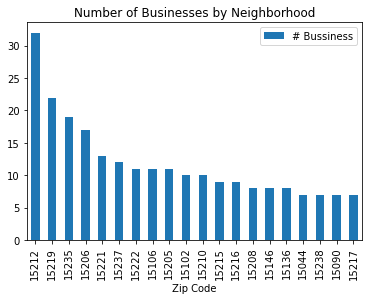

In [3]:
# We see now which zipcode "Neighborhoods" has the most businesses. Let's plot the top 20 Zipcodes

plt = neighborhoods_sorted.iloc[:20].plot(kind='bar', x="Zip Code", y="# Bussiness", title="Number of Businesses by Neighborhood")

Up we can see that the most family-friendly businesses are in the 15212 which is technically North Hills

The winners are 1: North Hills 15212 - 2: Downtown Pittsburgh 15219 - 3: Penn Hills 15235